### ***Interpolación***

En este cuaderno se muestra en orden todos los conceptos y algoritmos que se crearon en el capítulo de Interpolación 

In [160]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import sympy
import pandas as pd
from IPython.display import display, Math

# Define la ruta de las imagenes
rutaImagenes = '../Interpolacion-Aproximacion-Polinomial/Imagenes/'

#### ***Gráfica de un conjunto de puntos***
Graficamos un conjunto de puntos de una función seno

[[0.         0.75      ]
 [0.57119866 1.08807907]
 [1.14239733 1.39876898]
 [1.71359599 1.65689949]
 [2.28479466 1.84155839]
 [2.85599332 1.93778573]
 [3.42719199 1.93778573]
 [3.99839065 1.84155839]
 [4.56958931 1.65689949]
 [5.14078798 1.39876898]
 [5.71198664 1.08807907]
 [6.28318531 0.75      ]]


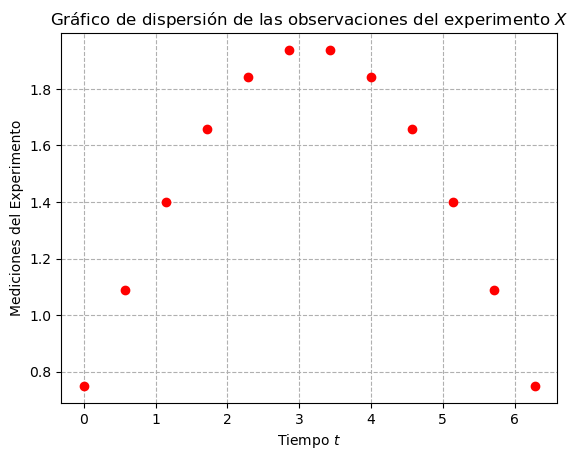

In [28]:
# Definimos la función
def f(x):
    return 1.2*np.sin(0.5*x)+0.75

# Generar un dominio de graficación
x = np.linspace(0, 2*np.pi, 12)

# Evaluar la función en los puntos dados
y = f(x)

# Crear un conjunto de duplas
duplas = np.array(list(zip(x,y)))
print(duplas)

# Graficar la función
plt.scatter(x, y, c='red', zorder=3)
plt.grid(linestyle='--')
plt.ylabel("Mediciones del Experimento")
plt.xlabel("Tiempo $t$")
plt.title("Gráfico de dispersión de las observaciones del experimento $X$")

# Guardar la figura
plt.savefig(rutaImagenes + 'dispersion-puntos.pdf')

# Mostrar la figura
plt.show()

#### ***Crear conjunto de Observaciones***

A continuación se realiza un código que usa la función $$f(x) = 1.2\sin(0.5x)+0.75$$ para generar un conjunto de puntos en el espacio discreto $$x={1, 2, 3, 4}$$. Estos puntos son graficados como un gráfico de dispersión y la gráfica es guarda en formato PDF

[[1.         1.32531065]
 [2.         1.75976518]
 [3.         1.94699398]
 [4.         1.84115691]]


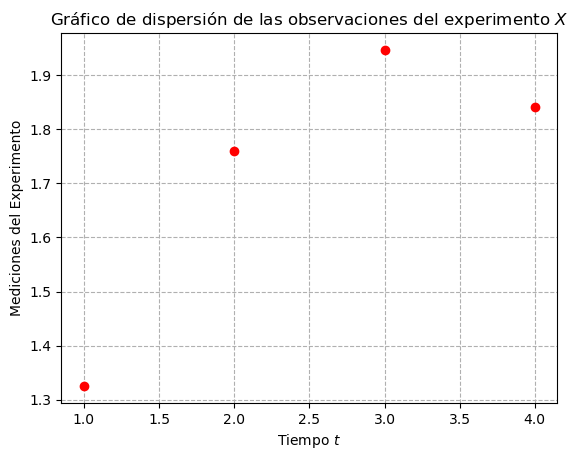

In [29]:
# Definimos la función
def f(x):
    return 1.2*np.sin(0.5*x)+0.75

# Generar un dominio de graficación
x = np.linspace(1, 4, 4)

# Evaluar la función en los puntos dados
y = f(x)

# Crear un conjunto de duplas
duplas = np.array(list(zip(x,y)))
print(duplas)

# Graficar la función
plt.scatter(x, y, c='red', zorder=3)

# Configurar la gráfica
plt.grid(linestyle='--')
plt.ylabel("Mediciones del Experimento")
plt.xlabel("Tiempo $t$")
plt.title("Gráfico de dispersión de las observaciones del experimento $X$")

# Guardar la gráfica en formato PDF
plt.savefig(rutaImagenes + 'dispersion-4-nodos.pdf')

# Mostrar la gráfica
plt.show()

#### ***Polinomio Interpolador Primitivo***
A continuación se da un sistema de ecuaciones de $4\times4$ para encontrar el polinomio interpolador que pasa por cuatro nodos $$X_1(1, 1.32),X_2(2, 1.75),X_3(3, 1.94),X_4(4, 1.84)$$

In [30]:
# Definir la matriz de coeficientes
A = np.array([[1, 1, 1, 1],
              [8, 4, 2, 1],
              [27, 9, 3, 1],
              [64, 16, 4, 1]])
print("Matriz de Coeficientes \n A = ", A)

# Definir el vector de términos independientes
b = np.array([1.32, 1.75, 1.94, 1.84])
print("Vector de Términos Independientes b = ", b)

# Resolver el sistema
X = np.linalg.solve(A, b)
print("Solución al Sistema X = ", X)

Matriz de Coeficientes 
 A =  [[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]
 [64 16  4  1]]
Vector de Términos Independientes b =  [1.32 1.75 1.94 1.84]
Solución al Sistema X =  [-0.00833333 -0.07        0.69833333  0.7       ]


#### ***Graficar el Polinomio Interpolador***
Una vez que se ha calculado los coeficientes del polinomio interpolador, se define el polinomio y se genera la gráfica.

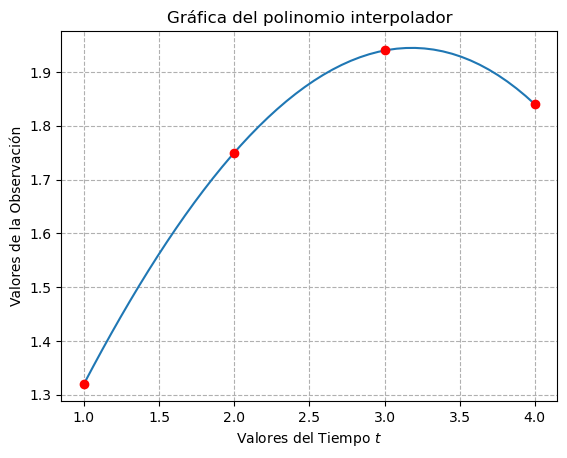

In [31]:
# Definir el polinomio interpolador
def P3(x):
    return -0.00833333*x**3 - 0.07*x**2 + 0.69833333*x + 0.7

# Definir el dominio de graficación
x = np.linspace(1, 4, 50)

# Evaluar el dominio en el polinomio interpolador
y = P3(x)

# Definir los puntos de interpolación
nX = [1, 2, 3, 4]
nY = [1.32, 1.75, 1.94, 1.84]

# Graficar la función
plt.plot(x, y, zorder=3)
plt.scatter(nX, nY, c='red', zorder=4)

# Configurar el gráfico
plt.grid(linestyle='--')
plt.ylabel("Valores de la Observación")
plt.xlabel("Valores del Tiempo $t$")
plt.title("Gráfica del polinomio interpolador")

# Guardar la imagen en formato PDF
plt.savefig(rutaImagenes + 'grafica-polinomio-interpolador.pdf')

# Mostrar la gráfica
plt.show()


#### ***Multiplicación Sintética***
Como se observó, el cálculo de un polinomio mediante productos notables no es un proceso fácil, por eso se  ha considerado el siguiente algoritmo.

In [32]:
# Definir el método de Multiplicación Sintética
def MutiplicacionSintetica(raices):
    
    # Crear el vector inicial
    Coeficientes = np.array([1, 0])
    
    # Crear un ciclo para recorrer las raíces
    for r in raices:
        
        # Multiplicar el vector de coeficientes por la raíz negativa
        Factor = -r * Coeficientes
        
        # Insertar un cero al Factor
        Factor = np.insert(Factor, 0, 0)
        Factor = Factor[:-1]
        
        # Sumar los vectores y actualizar los coeficientes
        Coeficientes = Coeficientes + Factor
        
        # Agregar un nuevo cero a la lista de coeficientes
        Coeficientes = np.append(Coeficientes, 0)
        
    # Devolver el vector de coeficientes
    return Coeficientes[:-1]

#### ***Probar el Algoritmo de Multiplicación Sintética***
Dado un conjunto de raíces $x=[1, 2, 3, 4, 5]$ encontrar los coeficientes del polinomio que contiene a las raíces

In [33]:
# Definir el conjunto de raíces
raices = np.array([1, 2, 3, 4, 5])

# Calcular los coeficientes
Coeficientes = MutiplicacionSintetica(raices)
print(Coeficientes)

[   1  -15   85 -225  274 -120]


#### ***Evaluación de un Polinomio***
A continuación se presenta un código que permite evaluar un polinomio de grado $n$ dados sus coeficientes mediante un vector en un valor $x=x_0$

In [34]:
# Definimos la función evalPoly
def evalPoly(coeficientes, x):
    
    # Iniciar la suma en cero
    suma = 0
    
    # Determinar el grado de la función polinómica
    n = len(coeficientes) - 1
    
    # Crear un ciclo para recorrer los coeficientes del polinomio
    for k, a in enumerate(coeficientes):
        
        # Calcular el valor de la serie
        suma += a * x**(n-k)
        
    # Devolver la evaluación
    return suma

#### ***Ejemplo***
Encontrar mediante el algoritmo de la Multiplicación Sintética un polinomio que pase por las raíces $x=2,3,5,7,11$ Luego verificar la validez del polinomio evaluando el conjunto de raíces mediante la función **evalPoly** y realizar una gráfica de la función polinómica en el intervalo cerrado $\left[2,11\right]$ 

Coeficientes:  [    1   -28   288 -1358  2927 -2310]
Evaluación:  [1.32       1.35229505 1.38386642 1.41470263 1.44479222 1.47412371
 1.50268562 1.53046648 1.55745481 1.58363914 1.60900799 1.63354989
 1.65725337 1.68010694 1.70209914 1.72321849 1.74345351 1.76279274
 1.78122468 1.79873788 1.81532086 1.83096213 1.84565023 1.85937368
 1.87212101 1.88388074 1.8946414  1.90439151 1.91311959 1.92081418
 1.92746379 1.93305696 1.93758221 1.94102805 1.94338303 1.94463566
 1.94477447 1.94378798 1.94166472 1.93839322 1.93396199 1.92835957
 1.92157448 1.91359525 1.90441039 1.89400844 1.88237792 1.86950736
 1.85538528 1.8400002 ]


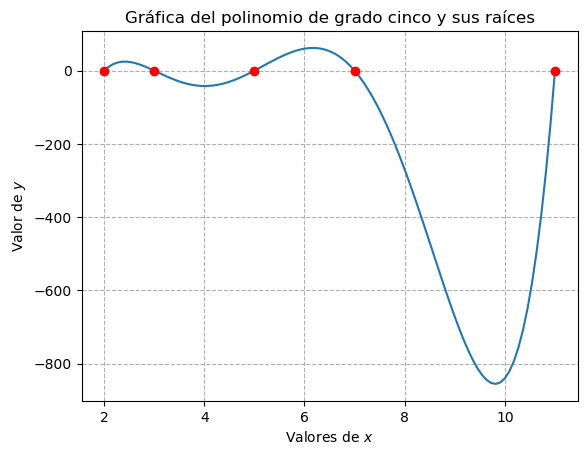

In [35]:
# Definir las raíces
raices = np.array([2, 3, 5, 7, 11])

# Calcular los coeficientes del polinomio
coeficientes = MutiplicacionSintetica(raices)
print("Coeficientes: ", coeficientes)

# Evaluar la validez del polinomio
y_ = evalPoly(coeficientes, raices)
print("Evaluación: ", y)

# Definir el dominio de graficación
x = np.linspace(2, 11, 100)
y = evalPoly(coeficientes, x)

# Graficar los puntos y la función polinómica
plt.scatter(raices, y_, c='red', zorder=4)
plt.plot(x, y, zorder=3)

# Configurar la gráfica
plt.grid(linestyle='--')
plt.xlabel('Valores de $x$')
plt.ylabel('Valor de $y$')
plt.title("Gráfica del polinomio de grado cinco y sus raíces")

# Guardar la imagen en formato PDF
plt.savefig(rutaImagenes + 'funcion-polinomica-grado-5.pdf')

# Mostrar la gráfica
plt.show()

#### ***Gráfica de los Polinomios de Lagrange***
El siguiente código permite graficar los cuatro polinomios resultantes del ejercicio de calcular los polinomios de Lagrange de los siguientes nodos: $\left(1,2\right),\left(2,3\right),\left(3,5\right),\left(4,7\right)$

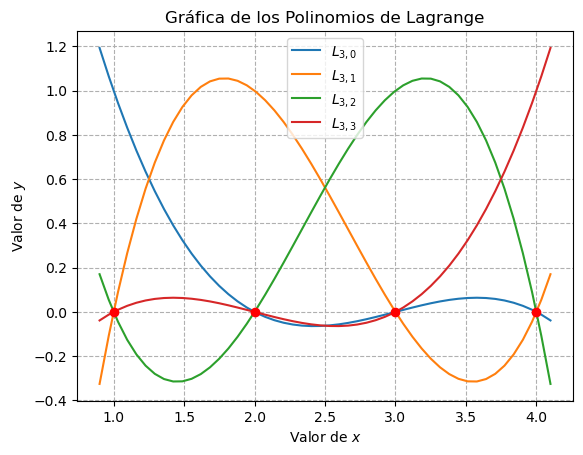

In [36]:
# Definir cada uno de los polinomios
def L_3_0(x):
    return (-1/6)*(x**3-9*x**2+26*x-24)

def L_3_1(x):
    return (1/2)*(x**3-8*x**2+19*x-12)

def L_3_2(x):
    return (-1/2)*(x**3-7*x**2+14*x-8)

def L_3_3(x):
    return (1/6)*(x**3-6*x**2+11*x-6)

# Crear el dominio de graficación
x = np.linspace(0.9,4.1,50)

# Evaluar cada polinomio
y_L_3_0 = L_3_0(x)
y_L_3_1 = L_3_1(x)
y_L_3_2 = L_3_2(x)
y_L_3_3 = L_3_3(x)

# Crear los nodos
nodos_x = np.array([1, 2, 3, 4])
nodos_y = np.array([0, 0, 0, 0])

# Graficar los polinomios y las raíces
plt.plot(x, y_L_3_0)
plt.plot(x, y_L_3_1)
plt.plot(x, y_L_3_2)
plt.plot(x, y_L_3_3)

# Configurar la legenda del gráfico
plt.legend(["$L_{3,0}$", "$L_{3,1}$", "$L_{3,2}$", "$L_{3,3}$"])

# Graficar los puntos de interpolación
plt.scatter(nodos_x, nodos_y, c='red', zorder=6)

# Configurar la gráfica
plt.grid(linestyle='--')
plt.xlabel("Valor de $x$")
plt.ylabel("Valor de $y$")
plt.title("Gráfica de los Polinomios de Lagrange")

# Guardar la imagen en formato PDF
plt.savefig(rutaImagenes + 'Polinomios-Lagrange-Grado-3.pdf')

# Mostrar la gráfica
plt.show()


#### ***Ejercicio:*** Gráfico del Polinomio Interpolador
Crear un programa en Python que permita graficar el polinomio interpolador $P_{3}\left(x\right)=-\dfrac{1}{6}\left(x^{3}+9x^{2}-14x+18\right)$ y mostrar los nodos $\left(1,2\right),\left(2,3\right),\left(3,5\right)$ y $\left(4,7\right)$ sobre la gráfica

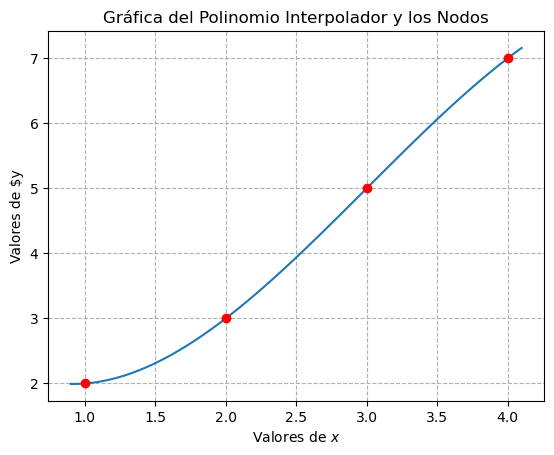

In [37]:
# Definir al polinomio interpolador
def P3(x):
    return (-1/6)*(x**3-9*x**2+14*x-18)

# Definir el dominio de graficación
x = np.linspace(0.9, 4.1, 100)

# Evarluar el polinomio
y = P3(x)

# Definir los nodos
nodos_x = np.array([1, 2, 3, 4])
nodos_y = np.array([2, 3, 5, 7])

# Graficar la función y los nodos
plt.plot(x, y)
plt.scatter(nodos_x, nodos_y, c='red', zorder=3)

# Configurar el gráfico
plt.grid(linestyle='--')
plt.xlabel("Valores de $x$")
plt.ylabel("Valores de $y")
plt.title("Gráfica del Polinomio Interpolador y los Nodos")

# Guardar el gráfico en formato PDF
plt.savefig(rutaImagenes + 'polinomio-interpolador-mediante-lagrange.pdf')

# Mostrar el gráfico
plt.show()

#### ***Polinimos de Lagrange***
El siguiente código permite calcular los polinomios de Lagrange dados el conjunto de nodos

In [38]:
# Definir la función que calcula el polinomio de Lagrange
def polyLagrange(nodos, k):
    
    # Crear un vector de nodos excepto el k
    headNodos = nodos[:k]
    tailNodos = nodos[k+1:]
    nodos_ = np.concatenate((headNodos, tailNodos))
    
    # Calcular la cantidad de nodos
    n = len(nodos_)
    
    # Calcular el denominador
    k_ = nodos[k]
    denominador = 1
    for i in range(n):
        denominador = denominador * (k_ - nodos_[i])            
    
    # Usar la función de Multiplicación Sintética para calcular el polinomio
    return MutiplicacionSintetica(nodos_) / denominador

#### ***Probar la función polyLagrange***
Calcular los polinomios de Lagrange para los nodos $x=1,2,3,4$

In [39]:
# Definir el conjunto de nodos
x = np.array([1, 2, 3, 4])

L_3_0 = polyLagrange(x, 0)
print(L_3_0)

L_3_1 = polyLagrange(x, 1)
print(L_3_1)

L_3_2 = polyLagrange(x, 2)
print(L_3_2)

L_3_3 = polyLagrange(x, 3)
print(L_3_3)

[-0.16666667  1.5        -4.33333333  4.        ]
[ 0.5 -4.   9.5 -6. ]
[-0.5  3.5 -7.   4. ]
[ 0.16666667 -1.          1.83333333 -1.        ]


#### ***Función:*** polyInterpoLagrange
El siguiente código permite calcular el polinomio interpolador usando los polinomios de Lagrange

In [40]:
# Definir la funcion
def polyInterpoLagrange(nodos):
    
    # Obtener los vectores de x e y
    x, y = nodos
    
    # Obtener la cantidad de nodos
    nX = len(x)
    nY = len(y)
    
    if nX != nY:
        print("x no tiene la misma cantidad de elementos que y")
        return
    
    # Crear un ciclo para calcular cada polinomio de Lagrange
    polyInterpola = np.zeros(nX)
    
    for k in range(nX):
        polyInterpola += y[k] * polyLagrange(x, k)        
        
    # Devolver el resultado
    return polyInterpola

#### ***Probar la función polyInterpolaLagrange***
Para probar la función enviaremos los nodos $x=[1, 2, 3, 4]$ y $y=[2, 3, 5, 7]$

In [41]:
# Definir los nodos
nodos_x = [1, 2, 3, 4]
nodos_y = [2, 3, 5, 7]
nodos = (nodos_x, nodos_y)

# Usar la función de interpolación
poly = polyInterpoLagrange(nodos)
print(poly)

[-0.16666667  1.5        -2.33333333  3.        ]


#### ***Función:*** Primos
A continuación se presenta un programa que permite calcular los números primeros números primos en un intervalo dado

In [42]:
# Definir el método que calcula los números primos
def Primos(nMin, nMax):
    # Crear un ciclo para determinar los números primos
    Primos_ = np.array([])

    for n in range(nMin, nMax + 1):
        
        # Crear un ciclo interno para contar los divisisores del número n
        divisores = 0
        for m in range(1, n+1):
            
            # Preguntar si m es divisor de n
            if (n % m == 0):
                divisores += 1
            
            # Si divisores es mayor que 2, n no es primo
            if divisores > 2:
                break
        
        # Si la cantidad de divisores de n es dos es un número primo
        if divisores==2:
            Primos_ = np.append(Primos_, n)
    
    # Devolver los números primos
    return Primos_

#### ***Ejercicio:*** Polinomio Interpolador Primos

En el siguiente código se generan los números primos del $2$ al $40$. Se crea un espacio discreto `nodos_x` para asociar un número natural $\mathbb{N}$ a cada número primo generado. Se usa la función `polyInterpolaLagrange` para encontrar el polinomio interpolador de los nodos (Nodos Primos).

Posteriormente se usa la función `evalPoly` para evaluar el polinomio interpolador encontrado graficarlo juntamente con los nodos de interpolación. Finalmente se guarda la gráfica en formato PDF.

[ 2.  3.  5.  7. 11. 13. 17. 19. 23. 29. 31. 37.]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[-2.00667388e-05  1.45034171e-03 -4.62081129e-02  8.54059193e-01
 -1.01394684e+01  8.08521933e+01 -4.39676596e+02  1.62068051e+03
 -3.93825365e+03  5.95011179e+03 -4.96338405e+03  1.70100000e+03]


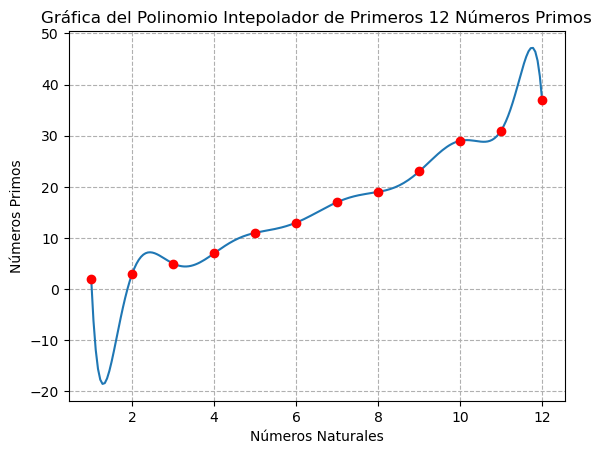

In [43]:
# Definir los nodos
nodos_y = Primos(2, 40)
print(nodos_y)
nMax = len(nodos_y)
nodos_x = np.array([n+1 for n in range(nMax)])
print(nodos_x)
nodos = (nodos_x, nodos_y)

# Usar la función de interpolación
poly = polyInterpoLagrange(nodos)
print(poly)

# Crear el dominio de graficación y evaluar
x = np.linspace(1, nMax, 200)
y = evalPoly(poly, x)

# Graficamos el polinomio y los puntos
plt.plot(x, y)
plt.scatter(nodos_x, nodos_y, c='red', zorder=3)

# Configurar la gráfica
plt.grid(linestyle='--')
plt.xlabel('Números Naturales')
plt.ylabel('Números Primos')
plt.title('Gráfica del Polinomio Intepolador de Primeros '+str(nMax)+' Números Primos')

# Guardar la gráfica en formato PDF
plt.savefig(rutaImagenes + 'polinomio-numeros-primos.pdf')

# Mostrar la gráfica
plt.show()


#### ***El Método de Neville***

A continuación se define el método de Neville.

In [167]:
# Definir el método de Neville
def Neville(nodos, console=False):
    
    # Obtener los valores de X e Y de los nodos
    nodos_x, nodos_y = nodos
    
    # Definir el x simbólico
    x = sympy.symbols('x')
    
    # Definir la matriz de elementos y los polinomios de grado cero (0)
    Neville_ = np.array([nodos_y])

    
    # Calcular los polinomios de grado uno (1)
    lenX = len(nodos_x)
    for n in range(lenX-1):
        
        P_ = np.array([])
        P = Neville_[n]
        lenP = len(P) - n
        
        if console:
            print("--- Polinomios de Grado (",n + 1,") -------------------------------------------------------")
        
        for k in range(lenP - 1):
            i = k
            j = i + n + 1
            denominador = nodos_x[j] - nodos_x[i]
            xi = nodos_x[i]
            xj = nodos_x[j]
            poly_ = ((x - xi)*P[j] - (x - xj)*P[j-1]) / denominador
            poly = sympy.expand(poly_)
            
            if console:
                # print("P(",i,",",j,") = (1 /",denominador,") ( x -",xi,")(",P[j],") - ( x -",xj,")(",P[j-1],") = ", poly)
                print("P(",i,",",j,") = ", poly)
            
            P_ = np.append(P_, poly)
            
        # Asegurar la dimensión de P_anterior
        dimP_ = len(P_)
        Q_ = np.pad(P_, (lenX - dimP_, 0), 'constant')
        Neville_ = np.vstack((Neville_, Q_)) 
        
    expMath = 'P_'+str(n) + '(x) = '+ sympy.latex(Neville_[-1][-1])
    
    return Neville_, expMath

#### ***Probar el Método de Neville***
Probar el método de Neville para los puntos $$(1,2),(2,3),(3,5),(4,7)\text{ y } (5,11)$$

--- Polinomios de Grado ( 1 ) -------------------------------------------------------
P( 0 , 1 ) =  x + 1
P( 1 , 2 ) =  2*x - 1
P( 2 , 3 ) =  2*x - 1
P( 3 , 4 ) =  4*x - 9
--- Polinomios de Grado ( 2 ) -------------------------------------------------------
P( 0 , 2 ) =  x**2/2 - x/2 + 2
P( 1 , 3 ) =  2*x - 1
P( 2 , 4 ) =  x**2 - 5*x + 11
--- Polinomios de Grado ( 3 ) -------------------------------------------------------
P( 0 , 3 ) =  -x**3/6 + 3*x**2/2 - 7*x/3 + 3
P( 1 , 4 ) =  x**3/3 - 3*x**2 + 32*x/3 - 9
--- Polinomios de Grado ( 4 ) -------------------------------------------------------
P( 0 , 4 ) =  x**4/8 - 17*x**3/12 + 47*x**2/8 - 103*x/12 + 6


<IPython.core.display.Math object>

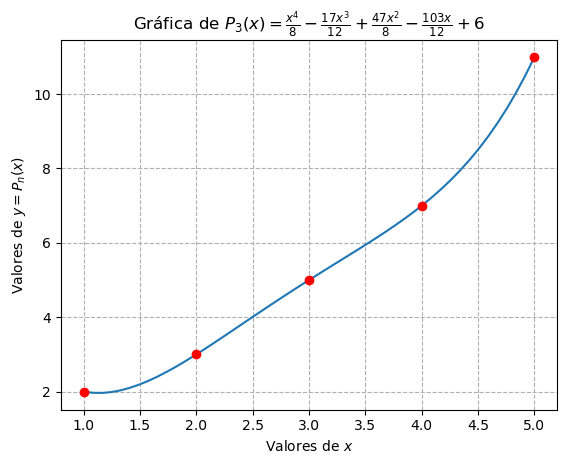

In [168]:
# Probar el método de Neville
nodos_x = np.array([1, 2, 3, 4, 5])
nodos_y = np.array([2, 3, 5, 7, 11])
nodos = (nodos_x, nodos_y)

poly, expMath = Neville(nodos, console=True)

display(Math(expMath))

# Evaluar el polinomio final
polinomio_final = poly[-1][-1]
x_eval = np.linspace(1, 5, 50)
resultados = [polinomio_final.subs(sympy.symbols('x'), valor).evalf() for valor in x_eval]

# Convertir a NumPy array (opcional)
resultados_np = np.array(resultados)

plt.plot(x_eval, resultados)
plt.scatter(nodos_x, nodos_y, c='red', zorder=3)

# Configurar la gráfica
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de $y=P_n(x)$')
plt.title('Gráfica de $'+expMath+'$')
plt.grid(linestyle='--')

# Guardar la gráfica en formato PDF
plt.savefig(rutaImagenes + 'polinomio-interpolador-neville.pdf')

# Mostrar la gráfica
plt.show()